# Rotating Coild Data Analysis for SI Q14 Magnets

## Import libraries and Load measurement data

In [1]:
import numpy as np
import matplotlib
matplotlib.use('Qt5Agg')

%matplotlib notebook

import matplotlib.pyplot as plt
from rotcoil import *

In [2]:
# Define serial numbers, one for each magnet

serials = [
    '002', '004', '005', '006', '007', '008', '009', 
    '010', '011', '012', '013', '014', '015', '016', '017', '018', '019',
    '020', '021', '023', '024', '025', '026', '027', '028', '029',
    '030', '031', '032', '033', '034', '035', '036', '037', '038', '039',
    '040', '041', '042', '043', '044', '045', '046', '047', '048', '049',
    '050', '051', '052', '053', '054', '055', '056', '057', '058', '059',
    '060', '061', '062', '063', '064', '065', '066', '067', '068', '069',
    '070', '071', '072', '073', '074', '075', '076', '077', '078', '079',
    '080', '081',
]

# Load all data
data = MagnetsAnalysis(RotCoilMeas_SIQuadQ14, serials)
data.init()

# Print info
data.print_info()


positive currents of monopolar power supply used generated field with opposite sign.
signs of all multipole values will be therefore inverted so as to generate default
excitation data tables: positive currents correspond to nominal focusing or defocusing field
properties.

index: 00, serial_number: 002, data sets: ['M1']
index: 01, serial_number: 004, data sets: ['M1']
index: 02, serial_number: 005, data sets: ['M1']
index: 03, serial_number: 006, data sets: ['M1']
index: 04, serial_number: 007, data sets: ['M1']
index: 05, serial_number: 008, data sets: ['M1']
index: 06, serial_number: 009, data sets: ['M1']
index: 07, serial_number: 010, data sets: ['M1']
index: 08, serial_number: 011, data sets: ['M1']
index: 09, serial_number: 012, data sets: ['M1']
index: 10, serial_number: 013, data sets: ['M1']
index: 11, serial_number: 014, data sets: ['M1']
index: 12, serial_number: 015, data sets: ['M1']
index: 13, serial_number: 016, data sets: ['M1']
index: 14, serial_number: 017, data set

## Maximum Integrated Quadrupole

In [3]:
# gets integrated strength at maximum current for all magnets
data.main_intmpole_at_max_current('M1')

index:00, serial:002, idx:12, max_current:  +147.9971 [A], diff_spec: +0.48 [%]
index:01, serial:004, idx:12, max_current:  +147.9952 [A], diff_spec: +0.43 [%]
index:02, serial:005, idx:12, max_current:  +147.9957 [A], diff_spec: +0.46 [%]
index:03, serial:006, idx:12, max_current:  +147.9943 [A], diff_spec: +0.44 [%]
index:04, serial:007, idx:12, max_current:  +147.9953 [A], diff_spec: +0.50 [%]
index:05, serial:008, idx:12, max_current:  +147.9953 [A], diff_spec: +0.46 [%]
index:06, serial:009, idx:12, max_current:  +147.9954 [A], diff_spec: +0.58 [%]
index:07, serial:010, idx:12, max_current:  +147.9956 [A], diff_spec: +0.45 [%]
index:08, serial:011, idx:12, max_current:  +147.9951 [A], diff_spec: +0.50 [%]
index:09, serial:012, idx:12, max_current:  +147.9961 [A], diff_spec: +0.49 [%]
index:10, serial:013, idx:12, max_current:  +147.9946 [A], diff_spec: +0.59 [%]
index:11, serial:014, idx:12, max_current:  +147.9967 [A], diff_spec: +0.50 [%]
index:12, serial:015, idx:12, max_curren

<IPython.core.display.Javascript object>


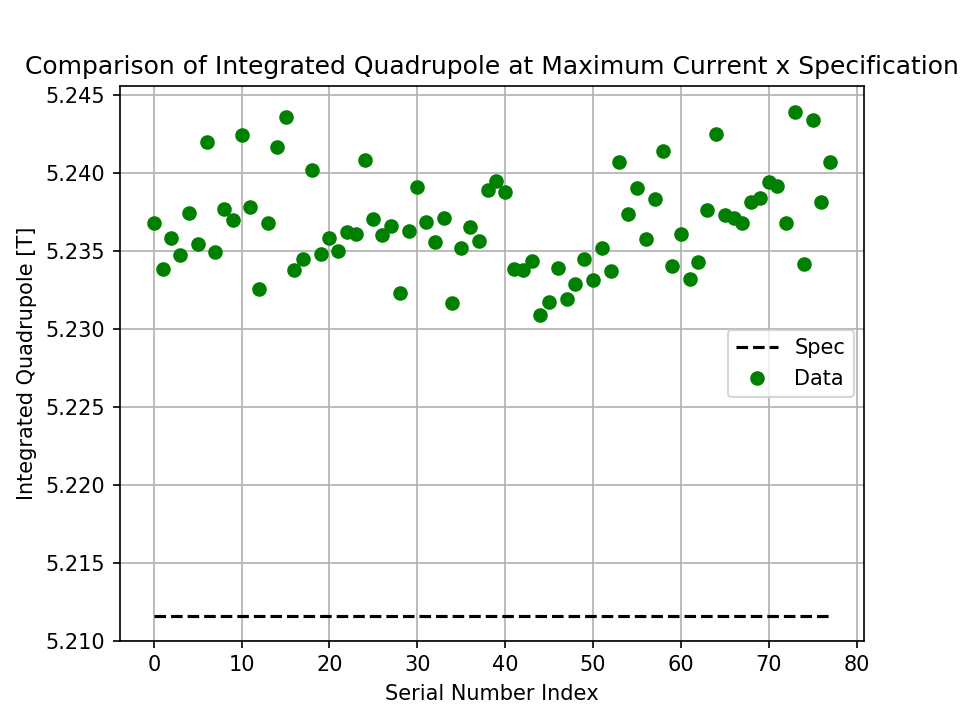

In [4]:
# plot data comparison with spec
data.main_intmpole_at_max_current_plot(plt)
plt.show()

## Magnetic Center

<IPython.core.display.Javascript object>


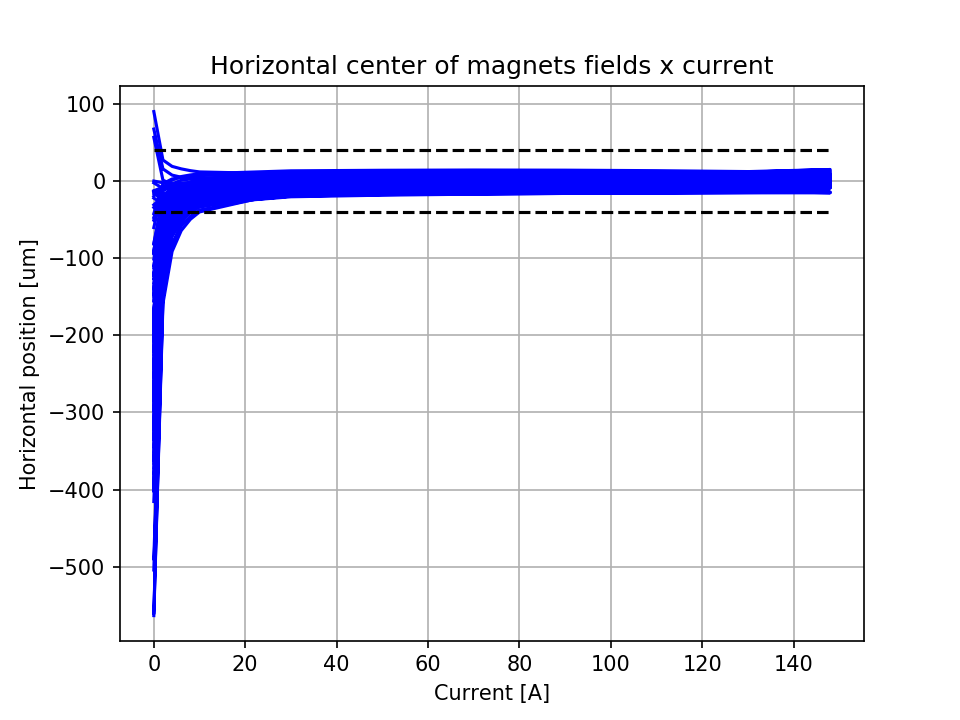

Horizontal center at maximum current [um]: -0.50 ± 6.45


In [5]:
# Horizontal center for all magnets x currents
data.magnetic_center_direction_plot('M1', 'X', plt)
plt.show()

<IPython.core.display.Javascript object>


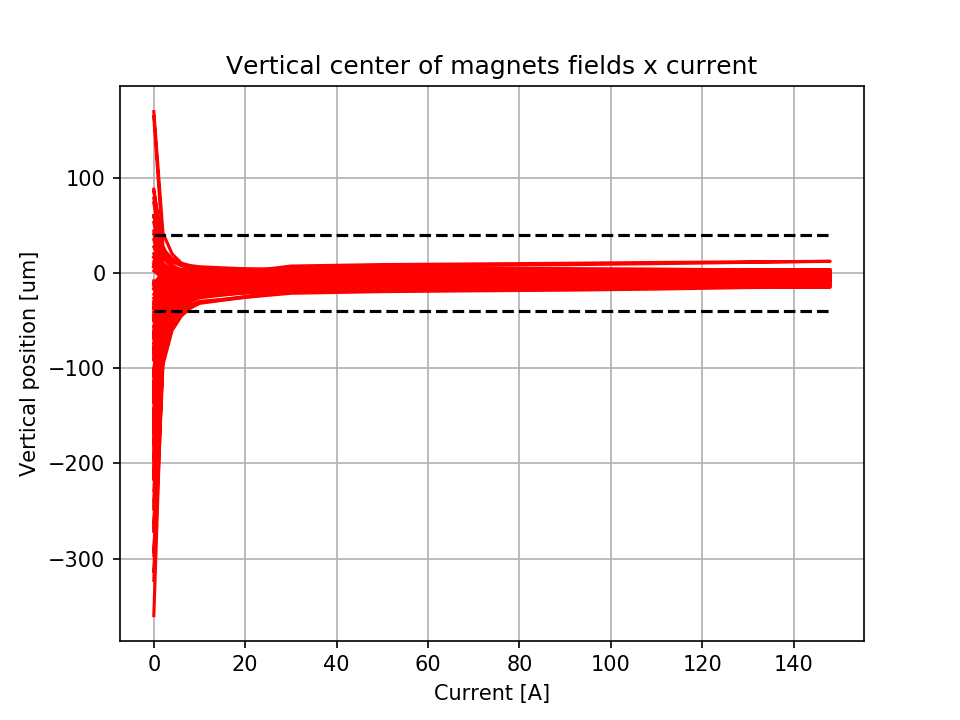

Vertical center at maximum current [um]: -4.10 ± 4.66


In [6]:
# Vertical center for all magnets y currents
data.magnetic_center_direction_plot('M1', 'Y', plt)
plt.show()

<IPython.core.display.Javascript object>


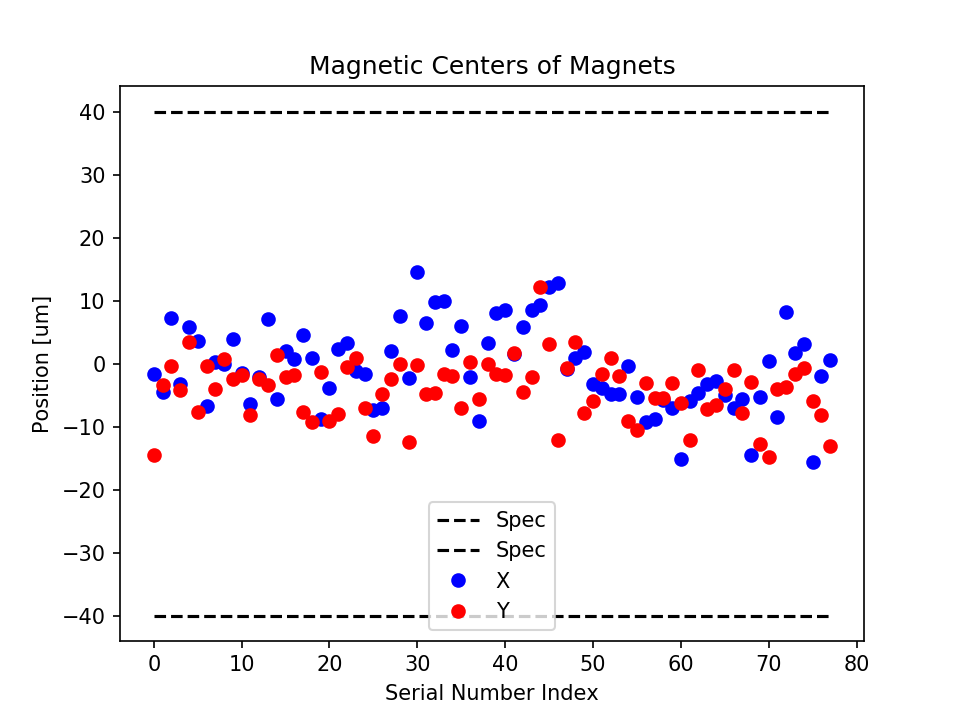

In [7]:
# Horizontal and vertical positions of all magnets
data.magnetic_center_plot('M1', plt)
plt.show()

<IPython.core.display.Javascript object>


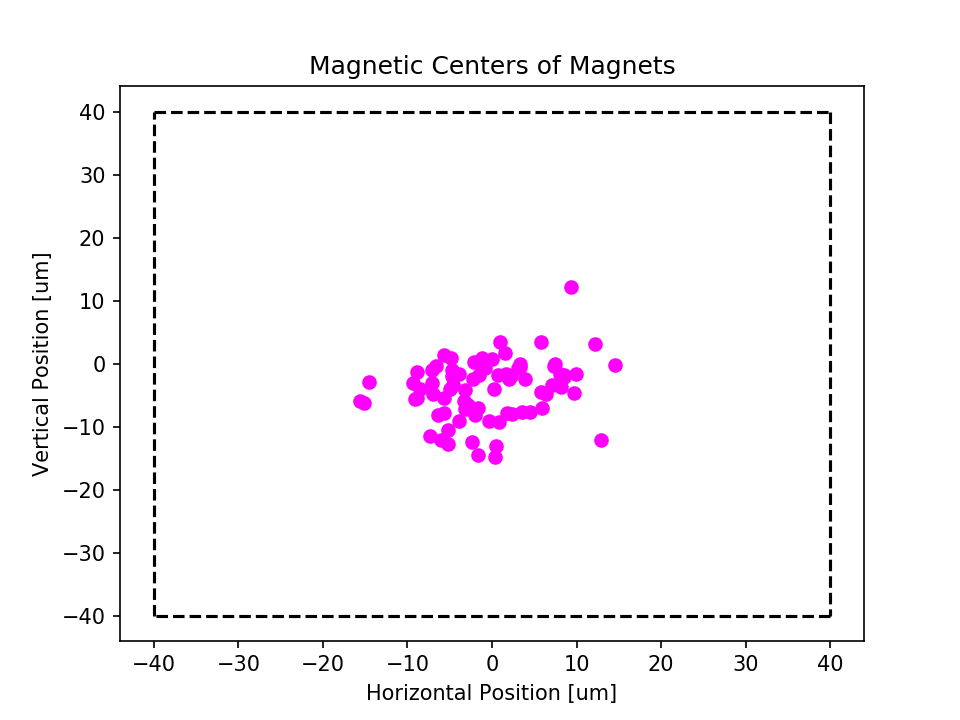

In [8]:
# Transverse plane positions
data.magnetic_center_transverse_plot('M1', plt)

## Ramp Up

<IPython.core.display.Javascript object>


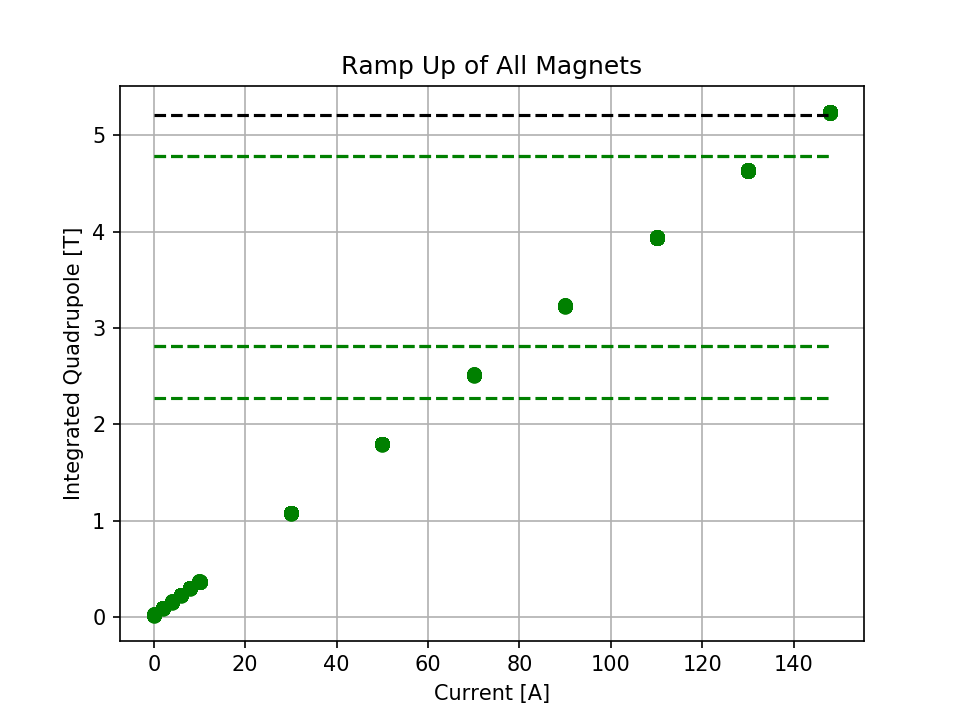

Nominal Integrated Quadrupole [T]:
SI-Fam:MA-QDA   : +2.271724
SI-Fam:MA-QDB1  : +2.810851
SI-Fam:MA-QDB2  : +4.786284
SI-Fam:MA-QDP1  : +2.810851
SI-Fam:MA-QDP2  : +4.786284


In [9]:
# Plot rampup integrated strength of main multipole and compare it to nominal values and maximum spec

data.rampup_excitation_curve_plot('M1', plt)
plt.show()

<IPython.core.display.Javascript object>


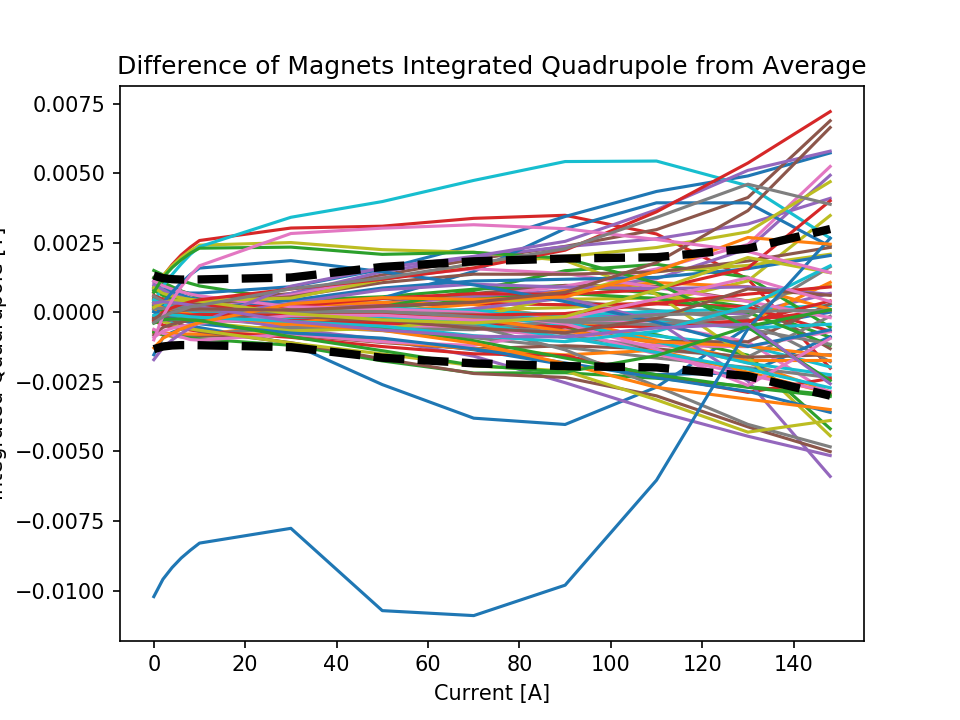

In [10]:
# Plot rampup dispersion amongst magnets

data.rampup_excitation_curve_dispersion_plot('M1', plt)
plt.show()

In [11]:
# Print random integrated main strength for various currents

data.rampup_excitation_curve_rms_error_print('M1')

current:   +0.000 [A], rms_error:  4.7043 [%], max_error: 36.3641 [%]
current:   +1.995 [A], rms_error:  1.2981 [%], max_error: 10.1395 [%]
current:   +3.998 [A], rms_error:  0.7322 [%], max_error:  5.6371 [%]
current:   +5.997 [A], rms_error:  0.5096 [%], max_error:  3.8196 [%]
current:   +7.996 [A], rms_error:  0.3924 [%], max_error:  2.8463 [%]
current:   +9.996 [A], rms_error:  0.3198 [%], max_error:  2.2441 [%]
current:  +29.996 [A], rms_error:  0.1161 [%], max_error:  0.7191 [%]
current:  +49.994 [A], rms_error:  0.0909 [%], max_error:  0.5963 [%]
current:  +69.994 [A], rms_error:  0.0729 [%], max_error:  0.4328 [%]
current:  +89.997 [A], rms_error:  0.0599 [%], max_error:  0.3030 [%]
current: +109.997 [A], rms_error:  0.0503 [%], max_error:  0.1527 [%]
current: +129.997 [A], rms_error:  0.0495 [%], max_error:  0.1153 [%]
current: +147.996 [A], rms_error:  0.0572 [%], max_error:  0.1378 [%]


<IPython.core.display.Javascript object>


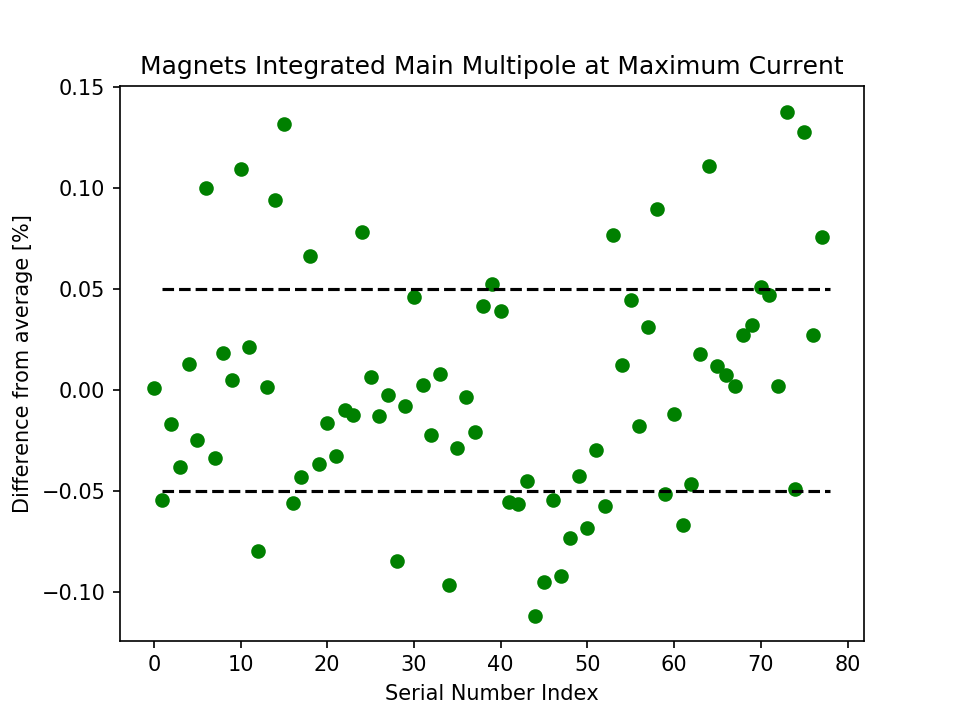

In [12]:
# Plot Integrated Quadrupole Error for maximum current

data.rampup_excitation_curve_rms_error_plot(plt)
plt.show()

## Hysteresis

<IPython.core.display.Javascript object>


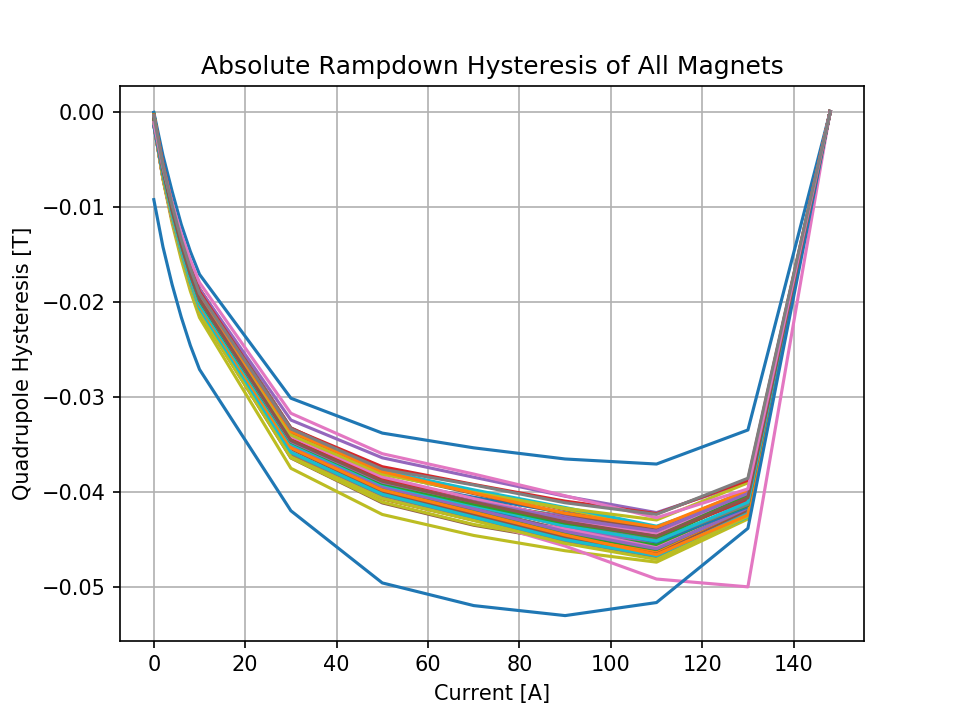

In [13]:
# Absolute

data.hysteresis_absolute_plot('M1', plt)
plt.show()

<IPython.core.display.Javascript object>


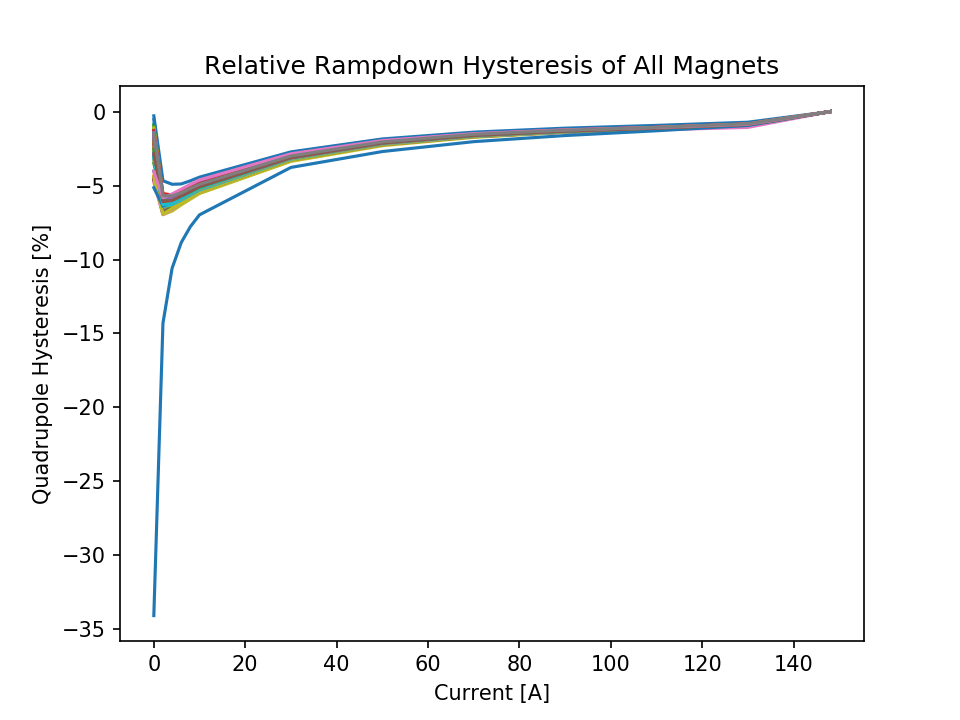

In [14]:
# Relative

data.hysteresis_relative_plot('M1', plt)
plt.show()

## Save Excitation Data Files

In [15]:
# save average excitation data to file

data.save_excdata_average('M1')

In [16]:
# save excitation data of all magnets to separate files
data.save_excdata_individuals('M1')